# Problem Statement:
Backorders are unavoidable, but by anticipating which things will be backordered,
planning can be streamlined at several levels, preventing unexpected strain on
production, logistics, and transportation. ERP systems generate a lot of data (mainly
structured) and also contain a lot of historical data; if this data can be properly utilized, a
predictive model to forecast backorders and plan accordingly can be constructed.
Based on past data from inventories, supply chain, and sales, classify the products as
going into backorder (Yes or No).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\akshay\Downloads\Kaggle_Training_Dataset_v2.csv")

C:\Users\akshay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# feature description 
* sku - Random product(sku) code 
* national_inv - Current inventory level of that sku
* lead_time - Transit time for product(if available at source)
* in_transit_qty - Quantity in transit from source
* forecast_x_month - Forecast sales for the net 3, 6, 9 months
* sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months
* min_bank - Minimum recommended amount to stock
* potential_issue - Indictor variable noting potential issue with item
* pieces_past_due - Parts overdue from source
* perf_x_months_avg - Source performance in the last 6 and 12 months
* local_bo_qty - Amount of stock orders overdue
* deck_risk – Part risk flag
* oe_constraint – Part risk flag
* ppap_risk – Part risk flag
* stop_auto_buy – Part risk flag
* rev_stop – Part risk flag
* went_on_backorder - Product went on backorder"""

In [3]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [4]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [5]:
df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(1687861, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [8]:
#we have 8 categorical column and 15 numerical column

In [9]:
df.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [10]:
df[df.duplicated()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder


In [11]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [12]:
df.describe(include='all')

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861.0,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,...,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,2
top,1026827.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,No,No,Yes,No,No
freq,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1300377,1687615,1484026,1626774,1687129,1676567
mean,NaN,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,...,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,...,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,...,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,...,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#mean is > 75 th percentile so it is right skewed
# max value is high compared to 75th percentile so there are outliers

In [14]:
medians=df.median()

C:\Users\akshay\AppData\Local\Temp/ipykernel_18016/2918878421.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians=df.median()


In [15]:
medians

national_inv         15.00
lead_time             8.00
in_transit_qty        0.00
forecast_3_month      0.00
forecast_6_month      0.00
forecast_9_month      0.00
sales_1_month         0.00
sales_3_month         1.00
sales_6_month         2.00
sales_9_month         4.00
min_bank              0.00
pieces_past_due       0.00
perf_6_month_avg      0.82
perf_12_month_avg     0.81
local_bo_qty          0.00
dtype: float64

In [16]:
for col in df.columns:
    mode = df[col].mode()
    print(f"Mode of {col}: {mode.to_string(index=False)}")

C:\Users\akshay\anaconda3\lib\site-packages\pandas\core\algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  warn(f"Unable to sort modes: {err}")
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Mode of in_transit_qty: 0.0
Mode of forecast_3_month: 0.0
Mode of forecast_6_month: 0.0
Mode of forecast_9_month: 0.0
Mode of sales_1_month: 0.0
Mode of sales_3_month: 0.0
Mode of sales_6_month: 0.0
Mode of sales_9_month: 0.0
Mode of min_bank: 0.0
Mode of potential_issue: No
Mode of pieces_past_due: 0.0
Mode of perf_6_month_avg: 0.99
Mode of perf_12_month_avg: 0.99
Mode of local_bo_qty: 0.0
Mode of deck_risk: No
Mode of oe_constraint: No
Mode of ppap_risk: No
Mode of stop_auto_buy: Yes
Mode of rev_stop: No
Mode of went_on_backorder: No


# missing values

In [17]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [18]:
# lead time having lot of null values
# we have null values for other feature which is in the last row

<AxesSubplot:>

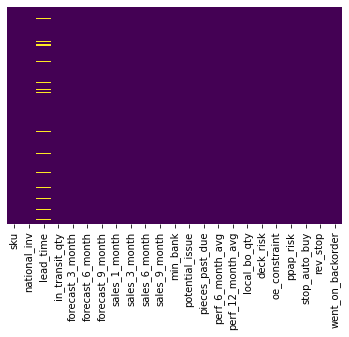

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
for col in df.select_dtypes(include=['float']):
    skewness=df[col].skew()
    kurtosis=df[col].kurt()
    print(f"{col} has skewness and kurtosis:{skewness,kurtosis}")

national_inv has skewness and kurtosis:(340.2858003326191, 131276.59257932162)
lead_time has skewness and kurtosis:(4.556295427885091, 26.23722750420738)
in_transit_qty has skewness and kurtosis:(166.18340424761558, 39606.10405290813)
forecast_3_month has skewness and kurtosis:(138.96832519579834, 25637.55029993227)
forecast_6_month has skewness and kurtosis:(138.96142721254265, 25189.903788272073)
forecast_9_month has skewness and kurtosis:(143.298874740098, 27048.452312581445)
sales_1_month has skewness and kurtosis:(196.1199898556541, 53855.92556025887)
sales_3_month has skewness and kurtosis:(141.2863795444832, 24198.860650933373)
sales_6_month has skewness and kurtosis:(139.17671201086372, 24305.44501338931)
sales_9_month has skewness and kurtosis:(135.05419147168155, 22844.80574661239)
min_bank has skewness and kurtosis:(131.21264893012795, 23549.240091008585)
pieces_past_due has skewness and kurtosis:(412.39190039252696, 207663.2258415861)
perf_6_month_avg has skewness and kurto

In [21]:
# from above values it is clear that numerical features are extremely right skewed and have very large no of outliers

# univariate analysis of categorical feature

In [22]:
cat_cols = df.select_dtypes(include=['object']).columns

In [23]:
for col in cat_cols:
    value_counts = df[col].value_counts()
    print(f"value counts for feature {col}:")
    print(value_counts)
    


value counts for feature sku:
1026827           1
1489889           1
1489899           1
1489898           1
1489897           1
                 ..
1910577           1
1910576           1
1910575           1
1910574           1
(1687860 rows)    1
Name: sku, Length: 1687861, dtype: int64
value counts for feature potential_issue:
No     1686953
Yes        907
Name: potential_issue, dtype: int64
value counts for feature deck_risk:
No     1300377
Yes     387483
Name: deck_risk, dtype: int64
value counts for feature oe_constraint:
No     1687615
Yes        245
Name: oe_constraint, dtype: int64
value counts for feature ppap_risk:
No     1484026
Yes     203834
Name: ppap_risk, dtype: int64
value counts for feature stop_auto_buy:
Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64
value counts for feature rev_stop:
No     1687129
Yes        731
Name: rev_stop, dtype: int64
value counts for feature went_on_backorder:
No     1676567
Yes      11293
Name: went_on_backorder, dtype: i

In [24]:
""""for column in df.select_dtypes(include=['object']):
    sns.countplot(data=df, x=column)"""

'"for column in df.select_dtypes(include=[\'object\']):\n    sns.countplot(data=df, x=column)'

<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

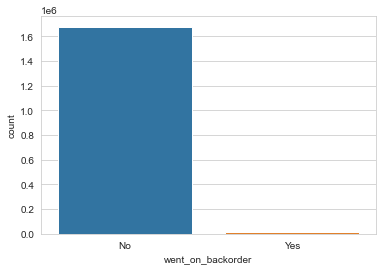

In [25]:
sns.set_style('whitegrid')
sns.countplot(x=df['went_on_backorder'],data=df)

<AxesSubplot:xlabel='potential_issue', ylabel='count'>

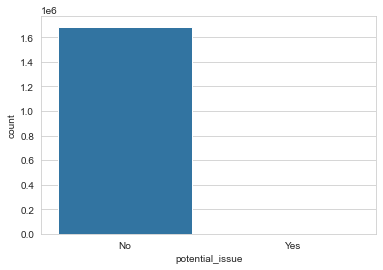

In [26]:
sns.set_style('whitegrid')
sns.countplot(x=df['potential_issue'],data=df)

<AxesSubplot:xlabel='deck_risk', ylabel='count'>

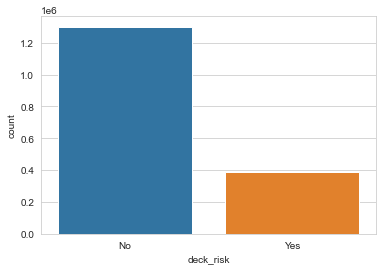

In [27]:
sns.set_style('whitegrid')
sns.countplot(x=df['deck_risk'],data=df)

<AxesSubplot:xlabel='oe_constraint', ylabel='count'>

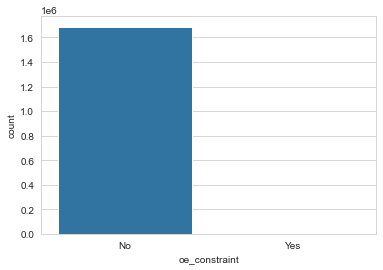

In [28]:
sns.set_style('whitegrid')
sns.countplot(x=df['oe_constraint'],data=df)

<AxesSubplot:xlabel='ppap_risk', ylabel='count'>

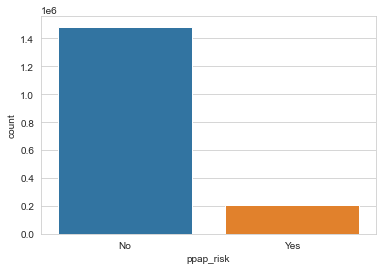

In [29]:
sns.set_style('whitegrid')
sns.countplot(x=df['ppap_risk'],data=df)

<AxesSubplot:xlabel='stop_auto_buy', ylabel='count'>

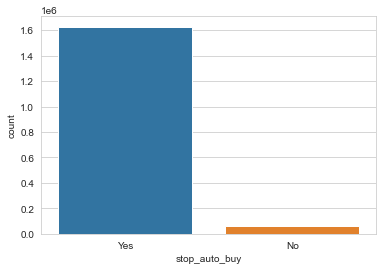

In [30]:
sns.set_style('whitegrid')
sns.countplot(x=df['stop_auto_buy'],data=df)

<AxesSubplot:xlabel='rev_stop', ylabel='count'>

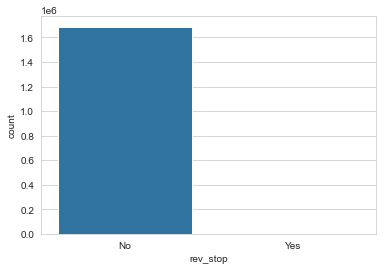

In [31]:
sns.set_style('whitegrid')
sns.countplot(x=df['rev_stop'],data=df)

In [32]:
# from countplot it is clearly visible that dataset is imbalanced

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_3_month', ylabel='Density'>

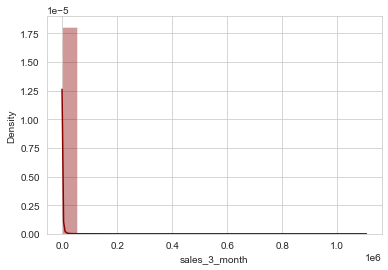

In [33]:
sns.distplot(df['sales_3_month'].dropna(),kde=True,color='darkred',bins=20)

In [34]:
#for col in df.select_dtypes(include=['float']):
    #sns.distplot(df1[col].dropna(),kde=True,color='darkred',bins=20)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='national_inv', ylabel='Density'>

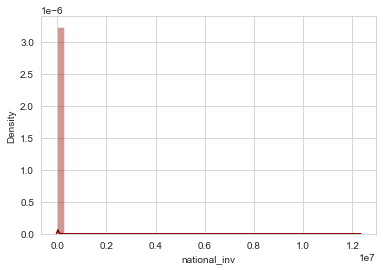

In [35]:
sns.distplot(df['national_inv'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

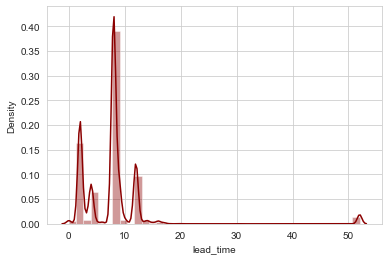

In [36]:
sns.distplot(df['lead_time'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='in_transit_qty', ylabel='Density'>

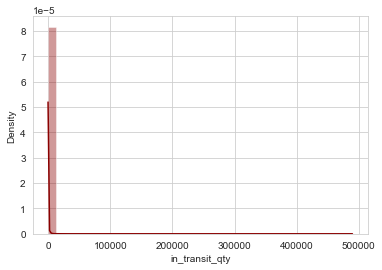

In [37]:
sns.distplot(df['in_transit_qty'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='forecast_3_month', ylabel='Density'>

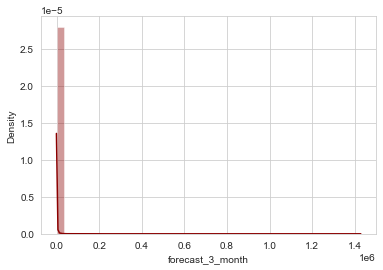

In [38]:
sns.distplot(df['forecast_3_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='forecast_6_month', ylabel='Density'>

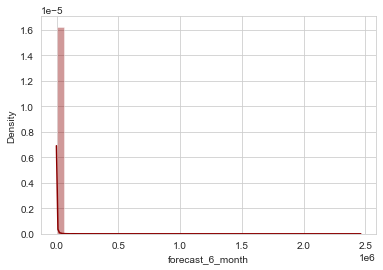

In [39]:
sns.distplot(df['forecast_6_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='forecast_9_month', ylabel='Density'>

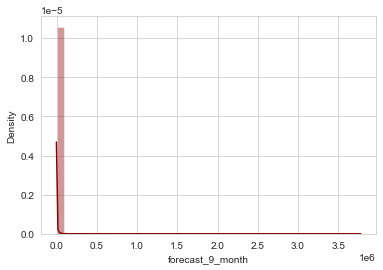

In [40]:
sns.distplot(df['forecast_9_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_1_month', ylabel='Density'>

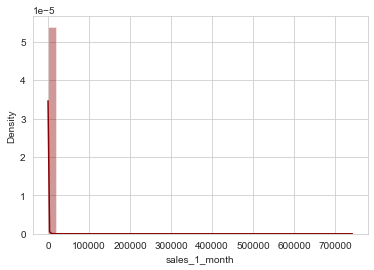

In [41]:
sns.distplot(df['sales_1_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_3_month', ylabel='Density'>

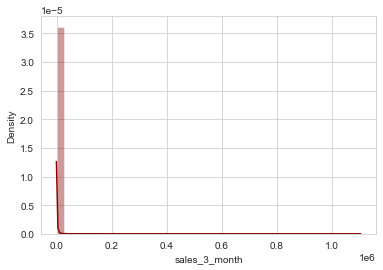

In [42]:
sns.distplot(df['sales_3_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_6_month', ylabel='Density'>

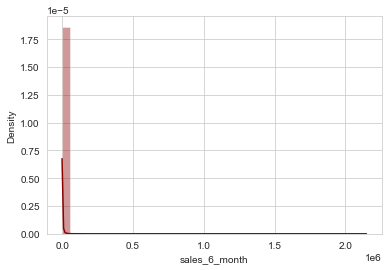

In [43]:
sns.distplot(df['sales_6_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_9_month', ylabel='Density'>

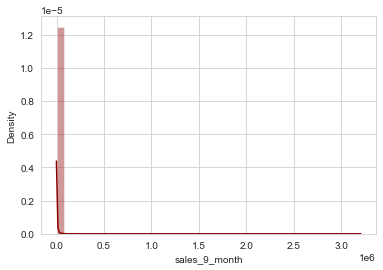

In [44]:
sns.distplot(df['sales_9_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_bank', ylabel='Density'>

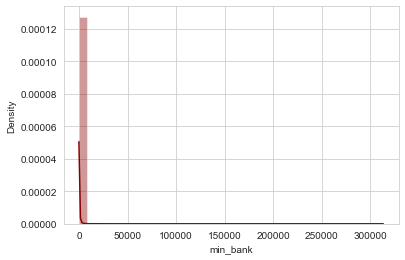

In [45]:
sns.distplot(df['min_bank'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pieces_past_due', ylabel='Density'>

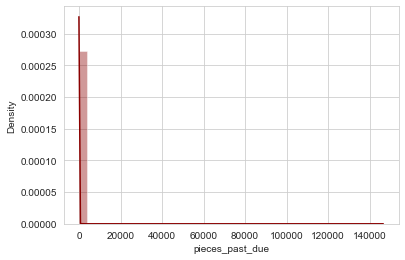

In [46]:
sns.distplot(df['pieces_past_due'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perf_6_month_avg', ylabel='Density'>

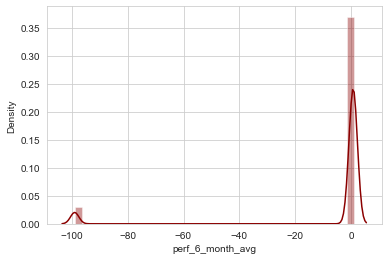

In [47]:
sns.distplot(df['perf_6_month_avg'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='perf_12_month_avg', ylabel='Density'>

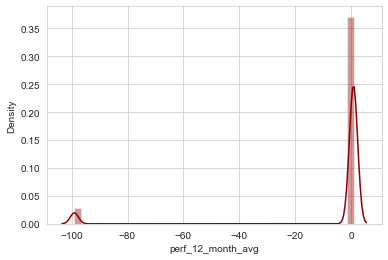

In [48]:
sns.distplot(df['perf_12_month_avg'],kde=True,color='darkred',bins=40)

<function matplotlib.pyplot.show(close=None, block=None)>

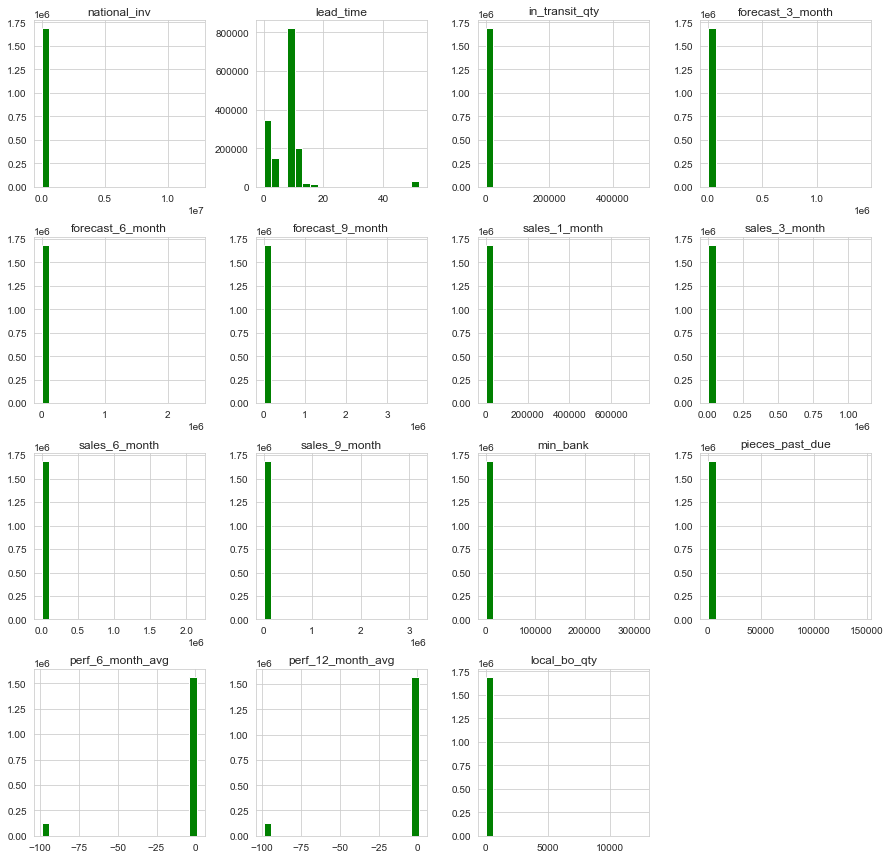

In [49]:
df.hist(color='green',bins=20,figsize=(15,15))
plt.show

### from above density plots its is clearly visible that distribution is highly skewed 

In [50]:
target_variable = df['went_on_backorder']

In [51]:
target_variable

0           No
1           No
2           No
3           No
4           No
          ... 
1687856     No
1687857    Yes
1687858     No
1687859     No
1687860    NaN
Name: went_on_backorder, Length: 1687861, dtype: object

In [52]:
df=df.set_index('sku')

In [53]:
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [54]:
"""for col in df.columns:
    if df[col].dtype != 'object':
        plt.boxplot(x='went_on_backorder',data=df)
        plt.title(col)
        plt.show()"""

"for col in df.columns:\n    if df[col].dtype != 'object':\n        plt.boxplot(x='went_on_backorder',data=df)\n        plt.title(col)\n        plt.show()"

In [55]:
"""plt.figure(figsize=(15,15))
sns.boxplot(data=df['sales_3_month'],palette='winter')
plt.title(col)
plt.show()"""

"plt.figure(figsize=(15,15))\nsns.boxplot(data=df['sales_3_month'],palette='winter')\nplt.title(col)\nplt.show()"

## outlier detection

In [56]:
quartiles = df.quantile([0.25, 0.5, 0.75])

In [57]:
quartiles

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0.25,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.66,0.0
0.50,15.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,0.82,0.81,0.0
0.75,80.0,9.0,0.0,4.0,12.0,20.0,4.0,15.0,31.0,47.0,3.0,0.0,0.97,0.95,0.0


C:\Users\akshay\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='lead_time', ylabel='Count'>

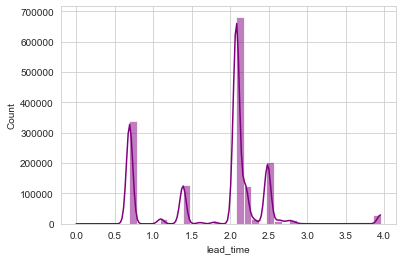

In [58]:
sns.histplot(np.log(df['lead_time']), bins=40, color='purple', kde=True)

In [59]:
numerical_features=df.select_dtypes(include=['float'])

In [60]:
numerical_features

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,-99.00,-99.00,1.0
1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,0.86,0.84,1.0
1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,0.86,0.84,6.0


In [61]:
numerical_features.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
national_inv,1.000000,0.003326,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.030677,-0.013544,-0.010732,0.014887
lead_time,0.003326,1.000000,-0.007238,-0.008010,-0.008513,-0.008738,-0.006013,-0.007279,-0.007270,-0.007313,-0.008198,-0.001500,-0.099940,-0.106019,-0.001306
in_transit_qty,0.098238,-0.007238,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.167460,0.003282,0.004292,0.066612
forecast_3_month,0.078199,-0.008010,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.361214,0.008445,0.008694,0.039419
forecast_6_month,0.079744,-0.008513,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.363147,0.008343,0.008499,0.039724
forecast_9_month,0.078948,-0.008738,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.366001,0.008306,0.008421,0.039732
sales_1_month,0.147449,-0.006013,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.249526,0.001163,0.002370,0.066188
sales_3_month,0.192605,-0.007279,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.304565,0.001488,0.002837,0.071030
sales_6_month,0.225067,-0.007270,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.323552,0.002898,0.004221,0.057765
sales_9_month,0.239613,-0.007313,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.317692,0.003438,0.004749,0.048880


<AxesSubplot:>

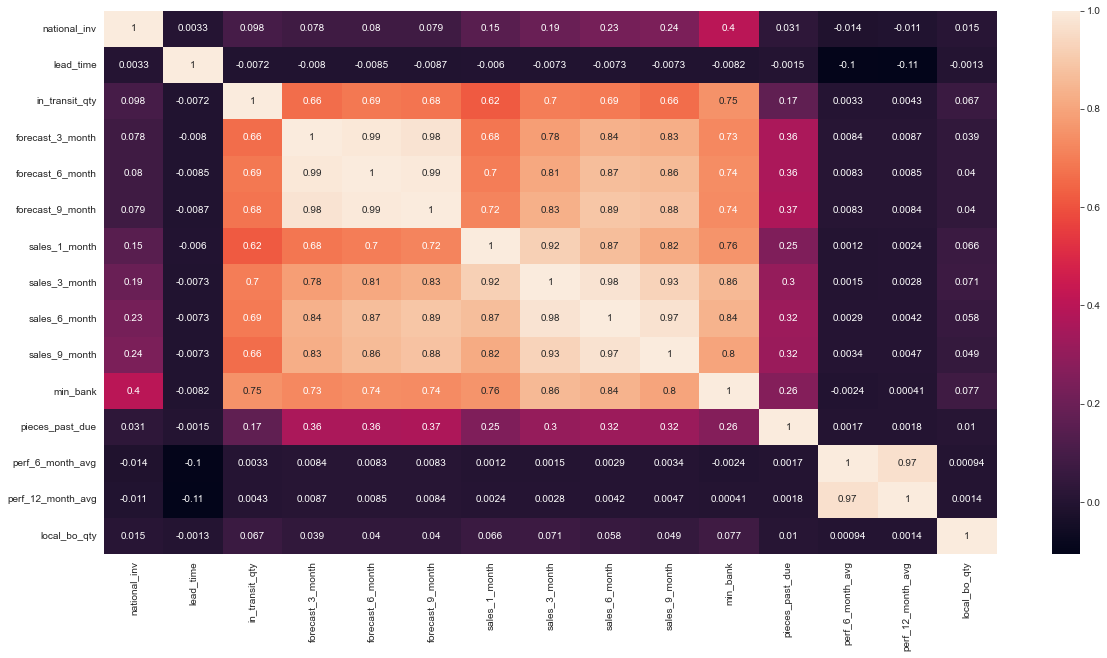

In [62]:
plt.figure(figsize = (20,10))
sns.heatmap(numerical_features.corr(),annot=True)

### from correlation it is clearly visible that sales and forecast for 3,6,9,12 months are nearly correlated 

# Data preprocessing

## Handling Missing value 

In [63]:
X = df.drop(['went_on_backorder'], axis=1)
y = df['went_on_backorder']

In [64]:
X

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No
1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No
1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No


In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [66]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.94,0.92,0.0,Yes,No,No,Yes,No
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,1.00,0.90,0.0,Yes,No,No,Yes,No
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,...,No,0.0,0.93,0.92,0.0,No,No,Yes,Yes,No
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.99,0.98,0.0,No,No,No,Yes,No
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,...,No,0.0,1.00,1.00,0.0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,...,No,0.0,1.00,1.00,0.0,No,No,No,Yes,No
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,...,No,0.0,1.00,0.90,0.0,No,No,Yes,Yes,No
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,...,No,0.0,0.67,0.62,0.0,No,No,No,Yes,No


In [67]:
X_train.isnull().sum()

national_inv             0
lead_time            70703
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
dtype: int64

In [68]:
X_train_Numerical=X_train.select_dtypes(include=['float'])

In [69]:
X_train_Numerical

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.94,0.92,0.0
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.90,0.0
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,26.0,0.0,0.93,0.92,0.0
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.98,0.0
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.00,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,3.0,0.0,1.00,1.00,0.0
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,22.0,0.0,1.00,0.90,0.0
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,13.0,0.0,0.67,0.62,0.0


In [70]:
X_train_Numerical['lead_time']=X_train_Numerical['lead_time'].fillna(X_train_Numerical['lead_time'].median())
    

C:\Users\akshay\AppData\Local\Temp/ipykernel_18016/3222128583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_Numerical['lead_time']=X_train_Numerical['lead_time'].fillna(X_train_Numerical['lead_time'].median())


In [71]:
X_train_Numerical.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [72]:
X_train_Numerical.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
dtype: int64

In [73]:
X_train_Numerical

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.94,0.92,0.0
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.90,0.0
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,26.0,0.0,0.93,0.92,0.0
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.98,0.0
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.00,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,3.0,0.0,1.00,1.00,0.0
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,22.0,0.0,1.00,0.90,0.0
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,13.0,0.0,0.67,0.62,0.0


In [74]:
X_train_categorical=X_train.select_dtypes(include=['O'])

In [75]:
X_train_categorical

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,
2260686,No,Yes,No,No,Yes,No
1428806,No,Yes,No,No,Yes,No
3033884,No,No,No,Yes,Yes,No
2184494,No,No,No,No,Yes,No
3032894,No,No,No,No,Yes,No
...,...,...,...,...,...,...
1607163,No,No,No,No,Yes,No
3003031,No,No,No,Yes,Yes,No
1243441,No,No,No,No,Yes,No


In [76]:
X_train_categorical.isnull().sum()

potential_issue    0
deck_risk          0
oe_constraint      0
ppap_risk          0
stop_auto_buy      0
rev_stop           0
dtype: int64

In [77]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.94,0.92,0.0,Yes,No,No,Yes,No
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,1.00,0.90,0.0,Yes,No,No,Yes,No
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,...,No,0.0,0.93,0.92,0.0,No,No,Yes,Yes,No
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.99,0.98,0.0,No,No,No,Yes,No
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,...,No,0.0,1.00,1.00,0.0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,...,No,0.0,1.00,1.00,0.0,No,No,No,Yes,No
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,...,No,0.0,1.00,0.90,0.0,No,No,Yes,Yes,No
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,...,No,0.0,0.67,0.62,0.0,No,No,No,Yes,No


In [78]:
X_train.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [79]:
y_train.isnull().sum()

0

In [80]:
quartiles_of_train = X_train.quantile([0.25, 0.5, 0.75])

In [81]:
quartiles_of_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0.25,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.66,0.0
0.50,15.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,0.82,0.81,0.0
0.75,80.0,9.0,0.0,4.0,12.0,20.0,4.0,15.0,31.0,47.0,3.0,0.0,0.97,0.95,0.0


In [82]:
for col in quartiles_of_train.columns:
    Q1=quartiles_of_train[col].quantile(0.25)
    Q3=quartiles_of_train[col].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    print(f"quartiles of {col} are Q1 is {Q1},Q3 is {Q3} and IQR is {IQR}")
    print(f"upper_limit is {upper_limit} and lower limit is {lower_limit}")
    print("-----------------------------------")

quartiles of national_inv are Q1 is 9.5,Q3 is 47.5 and IQR is 38.0
upper_limit is 104.5 and lower limit is -47.5
-----------------------------------
quartiles of lead_time are Q1 is 6.0,Q3 is 8.5 and IQR is 2.5
upper_limit is 12.25 and lower limit is 2.25
-----------------------------------
quartiles of in_transit_qty are Q1 is 0.0,Q3 is 0.0 and IQR is 0.0
upper_limit is 0.0 and lower limit is 0.0
-----------------------------------
quartiles of forecast_3_month are Q1 is 0.0,Q3 is 2.0 and IQR is 2.0
upper_limit is 5.0 and lower limit is -3.0
-----------------------------------
quartiles of forecast_6_month are Q1 is 0.0,Q3 is 6.0 and IQR is 6.0
upper_limit is 15.0 and lower limit is -9.0
-----------------------------------
quartiles of forecast_9_month are Q1 is 0.0,Q3 is 10.0 and IQR is 10.0
upper_limit is 25.0 and lower limit is -15.0
-----------------------------------
quartiles of sales_1_month are Q1 is 0.0,Q3 is 2.0 and IQR is 2.0
upper_limit is 5.0 and lower limit is -3.0
-----

In [83]:
outlier = X_train_Numerical[(X_train_Numerical < lower_limit) | (X_train_Numerical > upper_limit)]

In [84]:
outlier

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,48.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.94,0.92,NaN
1428806,72.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.90,NaN
3033884,3630.0,8.0,NaN,NaN,NaN,NaN,11.0,49.0,92.0,142.0,26.0,NaN,0.93,0.92,NaN
2184494,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,0.98,NaN
3032894,10.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,1.0,NaN,1.00,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,3.0,NaN,1.00,1.00,NaN
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,22.0,NaN,1.00,0.90,NaN
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,13.0,NaN,0.67,0.62,NaN


In [85]:
X_train_without_outlier = X_train_Numerical[(X_train_Numerical > lower_limit) & (X_train_Numerical < upper_limit)]

In [86]:
X_train_without_outlier

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1428806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3003031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1243441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### from above it is clearly visible that there are no outliers even though data has high kurtosis score

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X_train_Numerical)

In [88]:
X_scaled

array([[2.20876484e-03, 7.69230769e-02, 0.00000000e+00, ...,
        9.99400000e-01, 9.99200000e-01, 0.00000000e+00],
       [2.21070633e-03, 3.84615385e-02, 0.00000000e+00, ...,
        1.00000000e+00, 9.99000000e-01, 0.00000000e+00],
       [2.49853175e-03, 1.53846154e-01, 0.00000000e+00, ...,
        9.99300000e-01, 9.99200000e-01, 0.00000000e+00],
       ...,
       [2.20682336e-03, 1.53846154e-01, 1.43029946e-05, ...,
        9.96700000e-01, 9.96200000e-01, 0.00000000e+00],
       [2.20488187e-03, 2.30769231e-01, 0.00000000e+00, ...,
        9.96300000e-01, 9.97200000e-01, 0.00000000e+00],
       [2.21078722e-03, 3.84615385e-02, 0.00000000e+00, ...,
        9.97900000e-01, 9.98300000e-01, 0.00000000e+00]])

In [89]:
X_scaled.shape

(1181502, 15)

In [90]:
#pip install --upgrade scikit-learn

# Feature Engineering

### label encoding 

In [91]:
lbe = LabelEncoder()
for col in X_train_categorical.columns:
    X_trainObj_encoded= lbe.fit_transform(X_train_categorical[col])
    print(X_trainObj_encoded)

[0 0 0 ... 0 0 0]
[1 1 0 ... 0 1 1]
[0 0 0 ... 0 0 0]
[0 0 1 ... 0 0 0]
[1 1 1 ... 1 1 1]
[0 0 0 ... 0 0 0]


In [92]:
X_train_categorical['potential_issue'] = X_train_categorical['potential_issue'].map({'No' : 0, 'Yes' : 1}).astype('int')
X_train_categorical['deck_risk'] = X_train_categorical['deck_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
X_train_categorical['oe_constraint'] = X_train_categorical['oe_constraint'].map({'No' : 0, 'Yes' : 1}).astype('int')
X_train_categorical['ppap_risk'] = X_train_categorical['ppap_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
X_train_categorical['stop_auto_buy'] = X_train_categorical['stop_auto_buy'].map({'No' : 0, 'Yes' : 1}).astype('int')
X_train_categorical['rev_stop'] = X_train_categorical['rev_stop'].map({'No' : 0, 'Yes' : 1}).astype('int')

C:\Users\akshay\AppData\Local\Temp/ipykernel_18016/1763532770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical['potential_issue'] = X_train_categorical['potential_issue'].map({'No' : 0, 'Yes' : 1}).astype('int')
C:\Users\akshay\AppData\Local\Temp/ipykernel_18016/1763532770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical['deck_risk'] = X_train_categorical['deck_risk'].map({'No' : 0, 'Yes' : 1}).astype('int')
C:\Users\akshay\AppData\Local\Temp/ipykernel_18016/176

In [93]:
X_train_categorical

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,
2260686,0,1,0,0,1,0
1428806,0,1,0,0,1,0
3033884,0,0,0,1,1,0
2184494,0,0,0,0,1,0
3032894,0,0,0,0,1,0
...,...,...,...,...,...,...
1607163,0,0,0,0,1,0
3003031,0,0,0,1,1,0
1243441,0,0,0,0,1,0


In [94]:
y_train.shape

(1181502,)

In [95]:
y_train

sku
2260686    No
1428806    No
3033884    No
2184494    No
3032894    No
           ..
1607163    No
3003031    No
1243441    No
2019140    No
1233474    No
Name: went_on_backorder, Length: 1181502, dtype: object

In [96]:
y_train=y_train.to_frame()

In [97]:
 y_train['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')

sku
2260686    0
1428806    0
3033884    0
2184494    0
3032894    0
          ..
1607163    0
3003031    0
1243441    0
2019140    0
1233474    0
Name: went_on_backorder, Length: 1181502, dtype: int32

In [98]:
# y_train['went_on_backorder'] = y_train['some_other_column'].apply(lambda x: 1 if x == 'Yes' else 0)

In [99]:
#y_train['went_on_backorder'] = y_train['went_on_backorder'].replace({'No' : 0, 'Yes' : 1}).astype('int')


In [100]:
'went_on_backorder' in y_train.columns

True

In [101]:
y_train.columns

Index(['went_on_backorder'], dtype='object')

In [102]:
# y_train is series object thats why key error: went to backorder so convert to dataframe

In [103]:
#y_train = y_train.reset_index(drop=True)

In [104]:
X_train=pd.concat([X_train_Numerical,X_train_categorical],axis=1) #axis=1 along the column 

In [105]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.94,0.92,0.0,0,1,0,0,1,0
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.00,0.90,0.0,0,1,0,0,1,0
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,...,0.0,0.93,0.92,0.0,0,0,0,1,1,0
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.98,0.0,0,0,0,0,1,0
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,...,0.0,1.00,1.00,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,...,0.0,1.00,1.00,0.0,0,0,0,0,1,0
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,...,0.0,1.00,0.90,0.0,0,0,0,1,1,0
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,...,0.0,0.67,0.62,0.0,0,0,0,0,1,0


## Transfroming highly skewed data

In [106]:
# there are assumption with linear and logistic regression algorithm so necessary to have gaussian distribution
# with other algorithm it is not mandatory to have gausian distribution but it is better to perfom transformation

In [107]:
from scipy.stats import yeojohnson #applicable positive and negative numerical features

In [108]:
X_train_Numerical

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,48.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.94,0.92,0.0
1428806,72.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.90,0.0
3033884,3630.0,8.0,0.0,0.0,0.0,0.0,11.0,49.0,92.0,142.0,26.0,0.0,0.93,0.92,0.0
2184494,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.98,0.0
3032894,10.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,1.0,0.0,1.00,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,24.0,8.0,14.0,24.0,24.0,24.0,4.0,15.0,24.0,42.0,3.0,0.0,1.00,1.00,0.0
3003031,58.0,8.0,4.0,48.0,96.0,144.0,21.0,63.0,117.0,183.0,22.0,0.0,1.00,0.90,0.0
1243441,24.0,8.0,7.0,21.0,40.0,62.0,11.0,26.0,48.0,75.0,13.0,0.0,0.67,0.62,0.0


In [109]:
df_transformed1 = X_train_Numerical.apply(lambda x: yeojohnson(x)[0])

In [110]:
df_transformed1

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
sku,,,,,,,,,,,,,,,
2260686,22.071747,1.692497,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042,0.559765,-0.0,2.115633,2.077723,-0.0
1428806,29.984103,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,2.351134,2.001918,-0.0
3033884,540.752533,2.353960,-0.000000,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299,1.372445,-0.0,2.077780,2.077723,-0.0
2184494,0.000000,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,2.310876,2.315071,-0.0
3032894,6.512103,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184,0.559765,-0.0,2.351134,2.397558,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,12.977363,2.353960,0.688177,1.248345,1.557646,1.723048,0.993435,1.714897,2.135698,2.523397,0.918893,-0.0,2.351134,2.397558,-0.0
3003031,25.473091,2.353960,0.631844,1.300355,1.738287,2.020959,1.322473,2.091249,2.656806,3.047114,1.351981,-0.0,2.351134,2.001918,-0.0
1243441,12.977363,2.353960,0.666589,1.235273,1.638711,1.907823,1.224735,1.880584,2.389146,2.749504,1.273499,-0.0,1.225627,1.103084,-0.0


C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_1_month', ylabel='Density'>

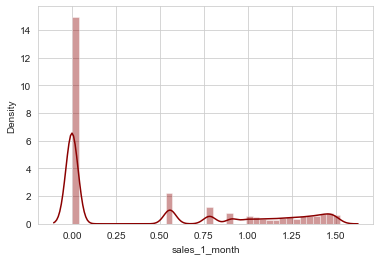

In [111]:
sns.distplot(df_transformed1['sales_1_month'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='national_inv', ylabel='Density'>

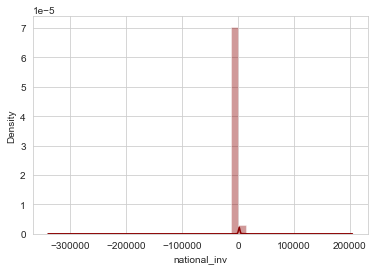

In [112]:
sns.distplot(df_transformed1['national_inv'],kde=True,color='darkred',bins=40)

C:\Users\akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales_3_month', ylabel='Density'>

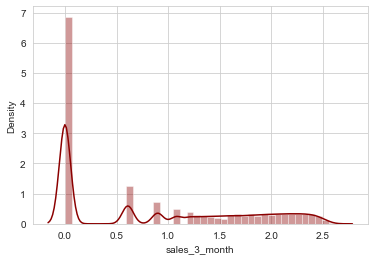

In [113]:
sns.distplot(df_transformed1['sales_3_month'],kde=True,color='darkred',bins=40)

In [114]:
#from above graphs it is clearly visible that highly skewed features are transformed into normally distributed data upto some extent.

In [115]:
df_transformed1['sales_3_month'].skew()

0.4231116402842924

In [116]:
df_transformed1['sales_3_month'].kurt()

-1.3902775254713786

In [117]:
df['sales_3_month'].skew()

141.2863795444832

In [118]:
df['sales_3_month'].kurt()

24198.860650933373

In [119]:
for col in df_transformed1.columns:
    skewness=df_transformed1[col].skew()
    kurtosis=df_transformed1[col].kurt()
    print(f"skewness and kurtosis for transformed {col} are {skewness} and {kurtosis}")

skewness and kurtosis for transformed national_inv are -78.71642365589851 and 82962.67692506158
skewness and kurtosis for transformed lead_time are 0.01928662079470568 and 1.6865078245838427
skewness and kurtosis for transformed in_transit_qty are 1.5369553317587943 and 0.43301200316024335
skewness and kurtosis for transformed forecast_3_month are 1.0008711209554877 and -0.8800849105749262
skewness and kurtosis for transformed forecast_6_month are 0.7864767861913393 and -1.2275187164855768
skewness and kurtosis for transformed forecast_9_month are 0.6893930280399226 and -1.3465277368144684
skewness and kurtosis for transformed sales_1_month are 0.6539198235859818 and -1.2611940186443091
skewness and kurtosis for transformed sales_3_month are 0.4231116402842924 and -1.3902775254713786
skewness and kurtosis for transformed sales_6_month are 0.31809807817037095 and -1.3903892980577481
skewness and kurtosis for transformed sales_9_month are 0.26799566081821913 and -1.3699464854261918
skewn

In [120]:
X_train_new=pd.concat([df_transformed1,X_train_categorical],axis=1)

In [121]:
X_train_new   #this is transformed + encoded data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2260686,22.071747,1.692497,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042,...,-0.0,2.115633,2.077723,-0.0,0,1,0,0,1,0
1428806,29.984103,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,2.351134,2.001918,-0.0,0,1,0,0,1,0
3033884,540.752533,2.353960,-0.000000,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299,...,-0.0,2.077780,2.077723,-0.0,0,0,0,1,1,0
2184494,0.000000,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.0,2.310876,2.315071,-0.0,0,0,0,0,1,0
3032894,6.512103,1.136901,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184,...,-0.0,2.351134,2.397558,-0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607163,12.977363,2.353960,0.688177,1.248345,1.557646,1.723048,0.993435,1.714897,2.135698,2.523397,...,-0.0,2.351134,2.397558,-0.0,0,0,0,0,1,0
3003031,25.473091,2.353960,0.631844,1.300355,1.738287,2.020959,1.322473,2.091249,2.656806,3.047114,...,-0.0,2.351134,2.001918,-0.0,0,0,0,1,1,0
1243441,12.977363,2.353960,0.666589,1.235273,1.638711,1.907823,1.224735,1.880584,2.389146,2.749504,...,-0.0,1.225627,1.103084,-0.0,0,0,0,0,1,0


In [122]:
X_train_new.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
potential_issue      0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
dtype: int64

In [123]:
y_train.shape

(1181502, 1)

## balancing Imbalanced dataset

In [124]:
from imblearn.over_sampling import SMOTE

In [125]:
sm = SMOTE(random_state=10)
x_train_balanced, y_train_balanced = sm.fit_resample(X_train_new, y_train)

In [126]:
y_train_balanced.value_counts()

went_on_backorder
No                   1173684
Yes                  1173684
dtype: int64

In [127]:
y_train_balanced=y_train_balanced.to_frame() #series to dataframe 

AttributeError: 'DataFrame' object has no attribute 'to_frame'

<AxesSubplot:xlabel='went_on_backorder', ylabel='count'>

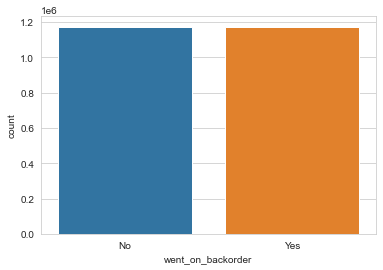

In [128]:
sns.countplot(x=y_train_balanced['went_on_backorder'],data=y_train_balanced)

In [129]:
x_train_balanced

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,22.071747,1.692497,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042,...,-0.000000,2.115633,2.077723,-0.000000,0,1,0,0,1,0
1,29.984103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,2.351134,2.001918,-0.000000,0,1,0,0,1,0
2,540.752533,2.353960,-0.0,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299,...,-0.000000,2.077780,2.077723,-0.000000,0,0,0,1,1,0
3,0.000000,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,2.310876,2.315071,-0.000000,0,0,0,0,1,0
4,6.512103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184,...,-0.000000,2.351134,2.397558,-0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347363,-5.295033,2.580586,0.0,1.169892,1.481014,1.680774,1.092546,1.543992,1.987080,2.252395,...,0.018747,1.458482,1.371745,0.027424,0,0,0,0,1,0
2347364,0.902085,2.353960,0.0,0.951181,1.306564,1.409433,0.556798,1.204379,1.414645,1.470294,...,0.006735,1.518930,1.575103,0.000000,0,0,0,0,1,0
2347365,11.642656,1.136901,0.0,1.153844,1.391283,1.512390,1.209362,1.578559,1.761199,1.852325,...,0.000000,2.000864,1.999491,0.000000,0,1,0,0,1,0
2347366,0.000000,2.353960,0.0,1.143228,1.386845,1.592981,0.909942,1.300013,1.710716,2.015164,...,0.000000,1.966571,2.147143,0.000000,0,0,0,0,1,0


In [130]:
y_train_balanced

,went_on_backorder
0,No
1,No
2,No
3,No
4,No
...,...
2347363,Yes
2347364,Yes
2347365,Yes
2347366,Yes


In [131]:
y_train_balanced['went_on_backorder'] = y_train_balanced['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')

## feature selection

In [132]:
from scipy.stats import pearsonr,kendalltau



In [133]:
x_train_balanced.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [134]:
x_train_balanced.dtypes

national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
potential_issue        int32
deck_risk              int32
oe_constraint          int32
ppap_risk              int32
stop_auto_buy          int32
rev_stop               int32
dtype: object

In [135]:
y_train_balanced.dtypes

went_on_backorder    int32
dtype: object

In [136]:
for col in x_train_balanced.columns:
       corr, pvalue = pearsonr(x_train_balanced[col], y_train_balanced['went_on_backorder'])
       print(f"Pearson's correlation coefficient of {col}: {corr}")
       print(f"P-value of {col}: {pvalue}")
       print("-----------------------------------------")
    
#x_train_balanced[col], y_train_balanced['went_on_backorder']  and not x_train_balanced, y_train_balanced
# kendall and pearson takes arrays and not dataframe


Pearson's correlation coefficient of national_inv: -0.05706489538273009
P-value of national_inv: 0.0
-----------------------------------------
Pearson's correlation coefficient of lead_time: -0.140461231974718
P-value of lead_time: 0.0
-----------------------------------------
Pearson's correlation coefficient of in_transit_qty: -0.14325056504088285
P-value of in_transit_qty: 0.0
-----------------------------------------
Pearson's correlation coefficient of forecast_3_month: 0.5365575991992263
P-value of forecast_3_month: 0.0
-----------------------------------------
Pearson's correlation coefficient of forecast_6_month: 0.5146023810528824
P-value of forecast_6_month: 0.0
-----------------------------------------
Pearson's correlation coefficient of forecast_9_month: 0.497059786064861
P-value of forecast_9_month: 0.0
-----------------------------------------
Pearson's correlation coefficient of sales_1_month: 0.26294310925744374
P-value of sales_1_month: 0.0
---------------------------

In [137]:
# Calculate Kendall's rank correlation coefficient
for col in x_train_balanced.columns:
    tau, pvalue = kendalltau(x_train_balanced[col],y_train_balanced['went_on_backorder'])
    print(f"Kendall's rank correlation coefficient of {col}: {tau}")
    print(f"P-value of {col}: {pvalue}")
    print("-----------------------------------------")

C:\Users\akshay\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Kendall's rank correlation coefficient of national_inv: -0.44909602861324566
P-value of national_inv: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of lead_time: -0.1012894504803363
P-value of lead_time: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of in_transit_qty: -0.07927941161857847
P-value of in_transit_qty: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of forecast_3_month: 0.40770673927445306
P-value of forecast_3_month: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of forecast_6_month: 0.37875606670901957
P-value of forecast_6_month: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of forecast_9_month: 0.3619024747029031
P-value of forecast_9_month: 0.0
-----------------------------------------
Kendall's rank correlation coefficient of sales_1_month: 0.22449919183742298
P-value of sales_1

In [138]:
data=pd.concat([x_train_balanced,y_train_balanced],axis=1)

In [139]:
data

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,22.071747,1.692497,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042,...,2.115633,2.077723,-0.000000,0,1,0,0,1,0,0
1,29.984103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,2.351134,2.001918,-0.000000,0,1,0,0,1,0,0
2,540.752533,2.353960,-0.0,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299,...,2.077780,2.077723,-0.000000,0,0,0,1,1,0,0
3,0.000000,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,2.310876,2.315071,-0.000000,0,0,0,0,1,0,0
4,6.512103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184,...,2.351134,2.397558,-0.000000,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347363,-5.295033,2.580586,0.0,1.169892,1.481014,1.680774,1.092546,1.543992,1.987080,2.252395,...,1.458482,1.371745,0.027424,0,0,0,0,1,0,1
2347364,0.902085,2.353960,0.0,0.951181,1.306564,1.409433,0.556798,1.204379,1.414645,1.470294,...,1.518930,1.575103,0.000000,0,0,0,0,1,0,1
2347365,11.642656,1.136901,0.0,1.153844,1.391283,1.512390,1.209362,1.578559,1.761199,1.852325,...,2.000864,1.999491,0.000000,0,1,0,0,1,0,1
2347366,0.000000,2.353960,0.0,1.143228,1.386845,1.592981,0.909942,1.300013,1.710716,2.015164,...,1.966571,2.147143,0.000000,0,0,0,0,1,0,1


<AxesSubplot:>

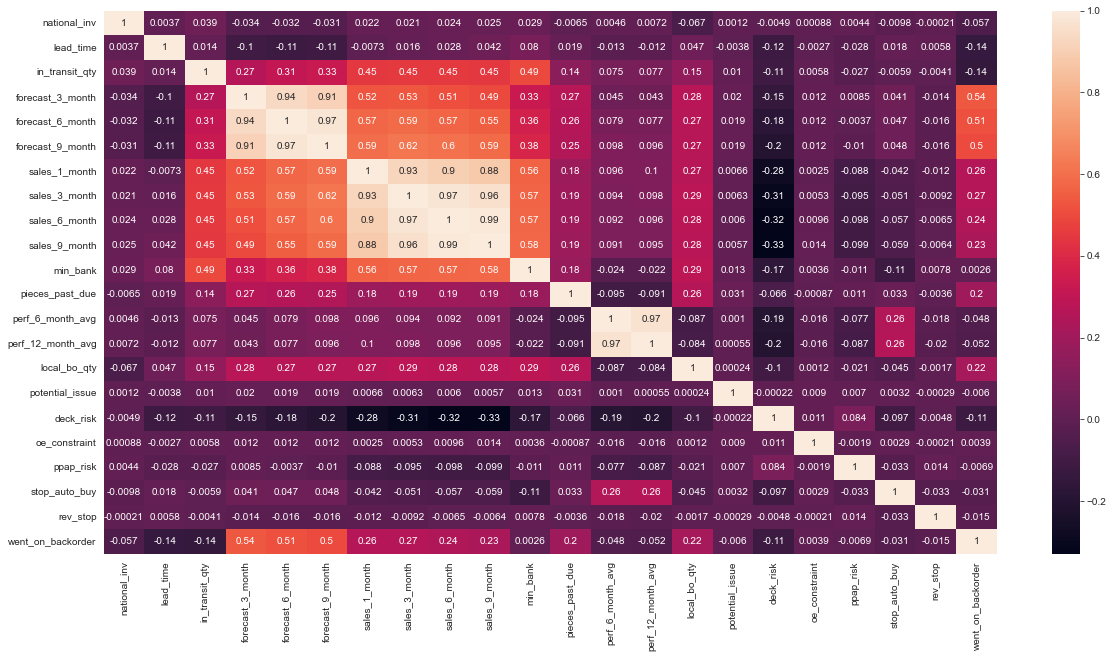

In [140]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True)

In [141]:
# from above analysis it is clearly visible that forecast and sales feature are related to target variable 

In [142]:
data.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [143]:
selected_X_train=data.iloc[:,3:10]

In [144]:
selected_X_train

,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month
0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042
1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299
3,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
4,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184
...,...,...,...,...,...,...,...
2347363,1.169892,1.481014,1.680774,1.092546,1.543992,1.987080,2.252395
2347364,0.951181,1.306564,1.409433,0.556798,1.204379,1.414645,1.470294
2347365,1.153844,1.391283,1.512390,1.209362,1.578559,1.761199,1.852325
2347366,1.143228,1.386845,1.592981,0.909942,1.300013,1.710716,2.015164


In [145]:
y_train_balanced

,went_on_backorder
0,0
1,0
2,0
3,0
4,0
...,...
2347363,1
2347364,1
2347365,1
2347366,1


In [146]:
selected_x_test=X_test.iloc[:,3:10]

In [147]:
selected_x_test

,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month
sku,,,,,,,
2079946,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149690,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1511794,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1441480,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2847275,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3098562,336.0,672.0,912.0,84.0,281.0,528.0,794.0
2281534,0.0,0.0,0.0,0.0,4.0,9.0,9.0
2154614,4.0,10.0,14.0,5.0,8.0,18.0,23.0


In [148]:
dfd=selected_x_test.median()

In [149]:
dfd

forecast_3_month    0.0
forecast_6_month    0.0
forecast_9_month    0.0
sales_1_month       0.0
sales_3_month       1.0
sales_6_month       2.0
sales_9_month       4.0
dtype: float64

In [150]:
selected_x_test.isnull().sum()

forecast_3_month    1
forecast_6_month    1
forecast_9_month    1
sales_1_month       1
sales_3_month       1
sales_6_month       1
sales_9_month       1
dtype: int64

In [151]:
selected_x_test.columns

Index(['forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month'],
      dtype='object')

In [152]:
for col in selected_x_test.columns:
    selected_x_test[col]=selected_x_test[col].fillna(selected_x_test[col].median())

In [153]:
selected_x_test.isnull().sum()

forecast_3_month    0
forecast_6_month    0
forecast_9_month    0
sales_1_month       0
sales_3_month       0
sales_6_month       0
sales_9_month       0
dtype: int64

In [154]:
y_test=y_test.fillna(y_test.mode())

In [155]:
mode_val = y_test.mode().values[0]
y_test = y_test.fillna(mode_val)

In [156]:
y_test

sku
2079946    No
1149690    No
1511794    No
1441480    No
2847275    No
           ..
3098562    No
2281534    No
2154614    No
3076390    No
1229424    No
Name: went_on_backorder, Length: 506359, dtype: object

In [157]:
y_test.isnull().sum()

0

In [158]:
y_test1=y_test.to_frame()

In [159]:
y_test1['went_on_backorder'] = y_test1['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')

In [160]:
y_test1

,went_on_backorder
sku,
2079946,0
1149690,0
1511794,0
1441480,0
2847275,0
...,...
3098562,0
2281534,0
2154614,0


# Logistic Regression

In [161]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
model1=LogisticRegression()

## Experiment1: with some selected feature and balanced data

In [164]:
model1.fit(selected_X_train,y_train_balanced)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [165]:
y_pred=model1.predict(selected_x_test) 

In [166]:
accuracy_score(y_test1,y_pred)

0.7179945453719594

In [167]:
model1.score(selected_X_train,y_train_balanced)

0.771029936507612

In [168]:
confusion_matrix(y_test1,y_pred)

array([[360636, 142248],
       [   548,   2927]], dtype=int64)

In [169]:
from sklearn.metrics import precision_score, recall_score

In [170]:
precision=precision_score(y_test1,y_pred)

In [171]:
precision

0.02016187360082659

In [172]:
recall_score(y_test1,y_pred)

0.8423021582733813

In [173]:
#a high precision score means that the model is accurately predicting positive cases, 
#while a high recall score means that the model is correctly identifying all positive cases.

## Experiment2 :with all features and Unbalanced data

In [174]:
X_train.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
potential_issue      0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
dtype: int64

In [175]:
y_train_for_all=y_train['went_on_backorder']

In [176]:
y_train_for_all = y_train['went_on_backorder'].map({'No' : 0, 'Yes' : 1}).astype('int')

In [177]:
y_train_for_all .to_frame()

,went_on_backorder
sku,
2260686,0
1428806,0
3033884,0
2184494,0
3032894,0
...,...
1607163,0
3003031,0
1243441,0


In [178]:
x_train_balanced

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,22.071747,1.692497,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.641042,...,-0.000000,2.115633,2.077723,-0.000000,0,1,0,0,1,0
1,29.984103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,2.351134,2.001918,-0.000000,0,1,0,0,1,0
2,540.752533,2.353960,-0.0,-0.000000,-0.000000,-0.000000,1.224735,2.037861,2.590563,2.968299,...,-0.000000,2.077780,2.077723,-0.000000,0,0,0,1,1,0
3,0.000000,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,2.310876,2.315071,-0.000000,0,0,0,0,1,0
4,6.512103,1.136901,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.898346,1.152610,1.188184,...,-0.000000,2.351134,2.397558,-0.000000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347363,-5.295033,2.580586,0.0,1.169892,1.481014,1.680774,1.092546,1.543992,1.987080,2.252395,...,0.018747,1.458482,1.371745,0.027424,0,0,0,0,1,0
2347364,0.902085,2.353960,0.0,0.951181,1.306564,1.409433,0.556798,1.204379,1.414645,1.470294,...,0.006735,1.518930,1.575103,0.000000,0,0,0,0,1,0
2347365,11.642656,1.136901,0.0,1.153844,1.391283,1.512390,1.209362,1.578559,1.761199,1.852325,...,0.000000,2.000864,1.999491,0.000000,0,1,0,0,1,0
2347366,0.000000,2.353960,0.0,1.143228,1.386845,1.592981,0.909942,1.300013,1.710716,2.015164,...,0.000000,1.966571,2.147143,0.000000,0,0,0,0,1,0


In [179]:
model=LogisticRegression()

In [180]:
model2=model.fit(x_train_balanced,y_train_balanced)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
X_test.isnull().sum()

national_inv             1
lead_time            30191
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
dtype: int64

In [182]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506359 entries, 2079946 to 1229424
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       506358 non-null  float64
 1   lead_time          476168 non-null  float64
 2   in_transit_qty     506358 non-null  float64
 3   forecast_3_month   506358 non-null  float64
 4   forecast_6_month   506358 non-null  float64
 5   forecast_9_month   506358 non-null  float64
 6   sales_1_month      506358 non-null  float64
 7   sales_3_month      506358 non-null  float64
 8   sales_6_month      506358 non-null  float64
 9   sales_9_month      506358 non-null  float64
 10  min_bank           506358 non-null  float64
 11  potential_issue    506358 non-null  object 
 12  pieces_past_due    506358 non-null  float64
 13  perf_6_month_avg   506358 non-null  float64
 14  perf_12_month_avg  506358 non-null  float64
 15  local_bo_qty       506358 non-null  float64
 16  

In [183]:
for col in X_test.select_dtypes(include=['float']):
    X_test[col]=X_test[col].fillna(X_test[col].median())

In [184]:
for col in X_test.select_dtypes(include=['O']):
    mode_val = X_test[col].mode().values[0]
    X_test[col] = X_test[col].fillna(mode_val)


In [185]:
X_test

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2079946,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,0.98,0.98,0.0,No,No,Yes,Yes,No
1149690,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,No,0.0,0.70,0.75,0.0,No,No,No,Yes,No
1511794,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,No,0.0,0.92,0.96,0.0,Yes,No,Yes,Yes,No
1441480,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,No,0.0,0.62,0.62,0.0,Yes,No,No,Yes,No
2847275,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0.0,-99.00,-99.00,0.0,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098562,456.0,8.0,69.0,336.0,672.0,912.0,84.0,281.0,528.0,794.0,...,No,0.0,0.96,0.97,0.0,No,No,Yes,Yes,No
2281534,23.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,9.0,9.0,...,No,0.0,0.95,0.96,0.0,Yes,No,No,Yes,No
2154614,2.0,8.0,4.0,4.0,10.0,14.0,5.0,8.0,18.0,23.0,...,No,0.0,0.98,0.97,0.0,No,No,No,Yes,No


In [186]:
X_test.isnull().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
dtype: int64

In [187]:
for col in X_test.select_dtypes(include=['O']):
    X_test[col]=X_test[col].map({'No' : 0, 'Yes' : 1}).astype('int')

In [188]:
x_train_balanced.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty', 'potential_issue', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [189]:
X_test.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [190]:
x_train_balanced.columns==X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True])

In [191]:
X_testN=X_test.reindex(columns=x_train_balanced.columns)

In [192]:
x_train_balanced.columns==X_testN.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [193]:
y_pred=model2.predict(X_testN) 

In [194]:
accuracy_score(y_test1,y_pred)

0.6216597315343462

In [195]:
model.score(x_train_balanced,y_train_balanced)

0.833644745945246

In [196]:
y_test1

,went_on_backorder
sku,
2079946,0
1149690,0
1511794,0
1441480,0
2847275,0
...,...
3098562,0
2281534,0
2154614,0


In [197]:
confusion_matrix(y_test1,y_pred)

array([[311662, 191222],
       [   354,   3121]], dtype=int64)

## without normalized data

In [198]:
model3=LogisticRegression()

In [199]:
X_train.columns==X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True])

In [200]:
X_testn=X_test.reindex(columns=X_train.columns)

In [201]:
X_testn

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
sku,,,,,,,,,,,,,,,,,,,,,
2079946,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.98,0.98,0.0,0,0,0,1,1,0
1149690,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.70,0.75,0.0,0,0,0,0,1,0
1511794,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.92,0.96,0.0,0,1,0,1,1,0
1441480,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.62,0.62,0.0,0,1,0,0,1,0
2847275,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098562,456.0,8.0,69.0,336.0,672.0,912.0,84.0,281.0,528.0,794.0,...,0.0,0.96,0.97,0.0,0,0,0,1,1,0
2281534,23.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,9.0,9.0,...,0.0,0.95,0.96,0.0,0,1,0,0,1,0
2154614,2.0,8.0,4.0,4.0,10.0,14.0,5.0,8.0,18.0,23.0,...,0.0,0.98,0.97,0.0,0,0,0,0,1,0


In [202]:
model3.fit(X_train,y_train)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [203]:
y_pred=model3.predict(X_testn)

In [204]:
accuracy_score(y_test,y_pred)

0.993040510783851

In [205]:
model3.score(X_train,y_train)

0.9933068247027935

## SVM

In [206]:
from sklearn.svm import LinearSVC
clf =LinearSVC()

In [207]:
clf.fit(selected_X_train,y_train_balanced)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [208]:
y_pred=clf.predict(selected_x_test)

In [209]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [210]:
accuracy_score(y_test1,y_pred)

0.7093801038393709

In [211]:
clf.score(selected_X_train,y_train_balanced)

0.7722824030999826

## DecisionTreeClassifier

## exp1 with selected transformed features and balanced, normalized data

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [213]:
model4=DecisionTreeClassifier()

In [214]:
model4.fit(selected_X_train,y_train_balanced)

DecisionTreeClassifier()

In [215]:
y_pred=model4.predict(selected_x_test)

In [216]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [217]:
accuracy_score(y_test1,y_pred)

0.8854014641785769

In [218]:
model4.score(selected_X_train,y_train_balanced)

0.9745851523919555

## exp2 with all transformed features and balanced data

In [219]:
model5=DecisionTreeClassifier()

In [220]:
model5.fit(x_train_balanced,y_train_balanced)

DecisionTreeClassifier()

In [221]:
y_pred=model5.predict(X_testN) 

In [222]:
accuracy_score(y_test1,y_pred)

0.8926729849770617

In [223]:
model5.score(x_train_balanced,y_train_balanced)

0.9975815466513985

## exp 3 all the features without transformation

In [224]:
model20=model5.fit(X_train,y_train)

In [225]:
y_predn=model20.predict(X_testn)

In [226]:
accuracy_score(y_test,y_predn)

0.9917844849207775

In [227]:
model20.score(X_train,y_train)

0.9996055867869881

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:

"""models = [LogisticRegression(), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]
def compare_models_train_test():
    for model in models:
        
        # Training the model
        model.fit(X_train, y_train)
        
        #Evaluating the model
        test_data_prediction = model.predict(X_testN)
        
        accuracy = accuracy_score(y_test, test_data_prediction)
        print('Accuracy score of the ', model, '=', accuracy)"""
    

In [ ]:
#compare_models_train_test()

In [ ]:
"""cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=5,)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
mean_accuracy_lr = mean_accuracy_lr*100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)"""


In [ ]:
"""cv_score_SVC = cross_val_score(SVC(kernel='linear'),X,y,cv=5)

print(cv_score_SVC)

mean_accuracy_SVC = sum(cv_score_SVC)/len(cv_score_SVC)
mean_accuracy_SVC = mean_accuracy_SVC*100
mean_accuracy_SVC = round(mean_accuracy_SVC,2)
print(mean_accuracy_SVC)"""

In [ ]:
"""cv_score_KN = cross_val_score(KNeighborsClassifier(),X,y,cv=5)

print(cv_score_KN)

mean_accuracy_KN = sum(cv_score_KN)/len(cv_score_KN)
mean_accuracy_KN = mean_accuracy_KN*100
mean_accuracy_KN = round(mean_accuracy_KN,2)
print(mean_accuracy_KN)"""

In [ ]:
 """cv_score_RF = cross_val_score(RandomForestClassifier(),X,y,cv=5)

print(cv_score_RF)

mean_accuracy_RF = sum(cv_score_RF)/len(cv_score_RF)
mean_accuracy_RF = mean_accuracy_RF*100
mean_accuracy_RF = round(mean_accuracy_RF,2)
print(mean_accuracy_RF)"""